# Hotel Booking cancelation

# Setup

First, we import some few library for malipulate and visualize the data of cancelation of hotel in Portugal

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the data and manipulate

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Data python\data_all\data_all\train.csv")
pd.set_option('display.max_columns', 32)
data.head()

,id,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,arrival_date
0,1,Resort Hotel,0,1,0,1,2,0.0,1,BB,PRT,Direct,Direct,0,0,0,A,A,1,250.0,0.0,0,Transient,55.00,1,0,2017-02-04
1,2,Resort Hotel,0,1,0,2,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,D,0,0.0,0.0,0,Transient,40.00,0,0,2016-03-04
2,3,City Hotel,1,56,0,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,29.0,0.0,0,Transient,60.00,0,0,2017-02-01
3,4,City Hotel,0,213,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,9.0,0.0,0,Transient,102.85,0,1,2016-10-05
4,5,Resort Hotel,0,328,4,10,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,243.0,0.0,0,Contract,121.50,0,2,2017-06-29


We can see that it have many column, we need deep dive in each of them to know exactly its data structure for feature engineering 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108785 entries, 0 to 108784
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              108785 non-null  int64  
 1   hotel                           108785 non-null  object 
 2   is_canceled                     108785 non-null  int64  
 3   lead_time                       108785 non-null  int64  
 4   stays_in_weekend_nights         108785 non-null  int64  
 5   stays_in_week_nights            108785 non-null  int64  
 6   adults                          108785 non-null  int64  
 7   children                        108785 non-null  float64
 8   babies                          108785 non-null  int64  
 9   meal                            108785 non-null  object 
 10  country                         108785 non-null  object 
 11  market_segment                  108785 non-null  object 
 12  distribution_cha

## Explain column meaning

**hotel**：City hotel hoặc Resort Hotel

**lead_time**：Số ngày từ khi đặt phòng đến ngày nghỉ trọ.

**stays_in_weekend_nights**：Số ngày đặt phòng và nghỉ lại (Thứ 7, Chủ Nhật)

**stays_in_week_nights**：Số ngày đặt phòng và nghỉ lại (Thứ 2 ~ Thứ 6)

**country**：Quốc gia.

**market_segment**：Phân loại thị trường(TA：Đại lý du lịch、TO：Điều hành du lịch)

**distribution_channel**：kênh cung cấp(TA：Đại lý du lịch、TO：Điều hành du lịch)

**is_repeated_guest**：có phải repeater hay không

**previous_cancellations**：Đã từng hủy đặt phòng trước đây

**previous_bookings_not_canceled**：chưa từng hủy đặt phòng trước đây

**reserved_room_type**：Loại phòng đặt

**assigned_room_type**：Loại phòng sắp xếp

**booking_changes**：Số lần thay đổi đặt phòng

**agent**：ẩn

**company**：ẩn

**days_in_waiting_list**：Số ngày lấy được xác nhận của khách hàng.

**customer_type**：loại khách hàng

**adr**：Tỉ giá trung bình ngày nghỉ trọ

**required_car_parking_spaces**：Yêu cầu bao nhiêu chỗ đỗ xe

**total_of_special_requests**：Số lượng yêu cầu đặc biệt.

*Đây là bộ dữ liệu trích xuất từ hệ thống Quản lý khách sạn (PMS), vì thế tên khách sạn và đại lý đặt phòng sẽ được ẩn 
đi.*

### Explain for meal

**RO**: Room only

**BB**: Bed & Breakfast

**HB**: Half Board (Breakfast and Dinner normally)

**FB**: Full Board (Beakfast, Lunch and Dinner)

**AI**: All Inclusive (all services of full board plus any others specified in each case)

That was so many column, we can see that have 2 type of column. It is categorical and continuous column. 
With categorical data, i will use OneHotEncode, and with continuous variables i will specify it distribution to know its structure

The company and the agent have been hidden so it don't have many impact to the data, Id just indicate like index. Column hotel don't sketch any clear picture, it just city hotel and resort, it isn't too meaningful, but important if our project aim at predict at each hotel data come from. 'arrival_date' column just show time the guest comming which is crucial for time analyst we will do it later

In [4]:
col = ['agent', 'company', 'id']

hotel_book = data.drop(col, axis= 1)

## Let deep dive to the categorical variables first

Take a look at all variables categorical data and know how many values each variables

In [8]:
# Categorical data
col = ['meal', 'country',"market_segment", 'distribution_channel', 'reserved_room_type', 'assigned_room_type',"customer_type"]

for i in hotel_book[col]:
    x = hotel_book[i].value_counts()
    print("Column name is:",i,"and it value is:",x)
    print()

Column name is: meal and it value is: BB    85099
HB    12705
SC    10238
FB      743
Name: meal, dtype: int64

Column name is: country and it value is: PRT    45865
GBR    10764
FRA     9498
ESP     7614
DEU     6387
       ...  
MDG        1
COM        1
NIC        1
LCA        1
PLW        1
Name: country, Length: 173, dtype: int64

Column name is: market_segment and it value is: Online TA        49545
Offline TA/TO    22682
Groups           19354
Direct           11196
Corporate         5079
Complementary      697
Aviation           230
Undefined            2
Name: market_segment, dtype: int64

Column name is: distribution_channel and it value is: TA/TO        88940
Direct       13203
Corporate     6449
GDS            188
Undefined        5
Name: distribution_channel, dtype: int64

Column name is: reserved_room_type and it value is: A    79728
D    16771
E     5708
F     2536
G     1796
B     1041
C      689
H      510
L        6
Name: reserved_room_type, dtype: int64

Column name 

**meal country**:5

**market_segment**: 177

**market_segment**: 8 

**distribution_channel**: 5 

**reserved_room_type**: 9

**assigned_room_type**: 11

**deposit_type**: 3

**customer_type**: 4

we can see that market_segment and distribution_channel and undefined values and it one have 7 values in order to make make it no affected to the others values so i decide to remove undefined as an outlier of data

In [5]:
# Take the index of the value we want
index_drop3 = list(hotel_book[(hotel_book['market_segment'] == 'Undefined') & 
                               (hotel_book['distribution_channel'] == 'Undefined')].index)

hotel_book = hotel_book.drop(index_drop3, axis = 0)

## Now let let take a look at continuous variables

In [10]:
hotel_book.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000,108783.000000
mean,0.370674,100.161661,0.909453,2.464962,1.845252,0.092377,0.007952,0.032542,0.094408,0.136961,0.211752,2.540296,97.086916,0.063098,0.544221
std,0.482987,104.953242,0.992508,1.887036,0.582489,0.377312,0.098158,0.177435,0.881887,1.448237,0.626868,18.401677,46.909768,0.246520,0.777143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.500000,0.000000,0.000000
50%,0.000000,65.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000
75%,1.000000,152.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000,1.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,67.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


we can see adr column that the max of adr is 5400 is too far from distribution maybe its a mistake of typing of employee of some error of system. 

And min adr is -6.38 which adr is Average Daily Rate which must be bigger than zero which mean zero or smaller is not appropriate in this case so we will remove them. 

Columns "stays_in_weekend_nights" and 'stays_in_week_nights' has value is zero, this column mean the day the book, thus, it have to be non zero value so we will remove row which both column is zero. The adult column is so on, we can't booking with adult is zero se we will remove that row too.

In [6]:
# Remove 2 columns stays_in_weekend_nights and stays_in_week_nights is zero
index_drop1 = list(hotel_book[(hotel_book["stays_in_weekend_nights"] == 0) & 
                          (hotel_book["stays_in_week_nights"] == 0)].index)
# Remove which adr = 0
index_drop2 = list(hotel_book[hotel_book["adr"] <= 0].index)

# Remove which adults = 0
index_drop3 = list(hotel_book[hotel_book["adults"] == 0].index)

index_drop = index_drop1 + index_drop2 + index_drop3

hotel_book = hotel_book.drop(index_drop, axis = 0)

## Checking Nan value

Check if any value is is Nan

In [ ]:
hotel_book.isnull().any()

Great! it don't have nan value

# Analysis and visualize data

1. How many bookings were canceled?
2. Which month has the highest number of visitors?
3. What is the monthly average daily rate per person over the year?
4. Which country has the most number of hotel visitors?
5. Which customer type contributes to the most hotel booking cancellations?
6. Which month has the highest number of cancellations?

In [7]:
hotel_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106840 entries, 0 to 108784
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           106840 non-null  object 
 1   is_canceled                     106840 non-null  int64  
 2   lead_time                       106840 non-null  int64  
 3   stays_in_weekend_nights         106840 non-null  int64  
 4   stays_in_week_nights            106840 non-null  int64  
 5   adults                          106840 non-null  int64  
 6   children                        106840 non-null  float64
 7   babies                          106840 non-null  int64  
 8   meal                            106840 non-null  object 
 9   country                         106840 non-null  object 
 10  market_segment                  106840 non-null  object 
 11  distribution_channel            106840 non-null  object 
 12  is_repeated_gues

In [51]:
barplot = hotel_book.copy()

barplot['guests'] = barplot['adults'] + barplot['children'] + barplot['babies']

col = ["is_canceled", "guests", "hotel"]

barplot = barplot[col].groupby(['hotel',"is_canceled"]).sum().reset_index()
barplot

,hotel,is_canceled,guests
0,City Hotel,0,78508.0
1,City Hotel,1,59177.0
2,Resort Hotel,0,50241.0
3,Resort Hotel,1,20127.0


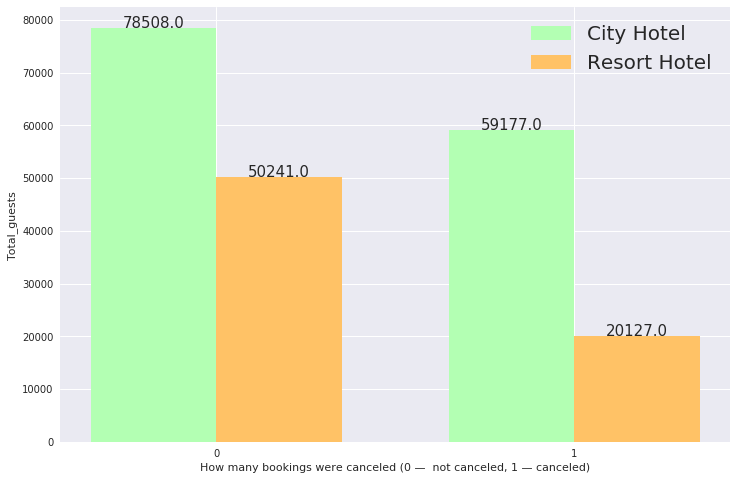

In [171]:
ind = np.arange(2)

with plt.style.context("seaborn"):
    fig, ax = plt.subplots(figsize = (12, 8))
    ax.bar(ind, barplot[0:2]["guests"], width = 0.35, color='#b3ffb3', label = "City Hotel")
    ax.bar(ind + 0.35, barplot[2:4]["guests"], width = 0.35, color='#ffc266', label = "Resort Hotel")
    ax.set(xlabel = "How many bookings were canceled (0 —  not canceled, 1 — canceled)", ylabel = "Total_guests")
    ax.legend(prop={'size': 20})
    ax.set_xticks(ind + 0.35 / 2)
    ax.set_xticklabels(('0', '1', '0', '1'))
    for index,data in enumerate(barplot[0:2]["guests"]):
         ax.text(x= index , y = data+1 , s=f"{data}" , fontdict=dict(fontsize=15), ha = "center")
    for index,data in enumerate(barplot[2:4]["guests"]):
         ax.text(x= index + 0.35, y = data+1 , s=f"{data}" , fontdict=dict(fontsize=15), ha = "center")

In [164]:
ind + 0.35 / 2

array([0.175, 1.175])

# Prepare data for machine learning

In [ ]:
cat_attri = ['meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', "customer_type"]

one_hot = pd.get_dummies(hotel_book[cat_attri])
hotel_book = hotel_book.drop(cat_attri, axis = 1)
# Join the encoded df
hotel_book = hotel_book.join(one_hot)
hotel_book

In [ ]:
from sklearn.mixture import GaussianMixture

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42, verbose = 2).fit(hotel_book)
             for k in range(1, 8)]

In [ ]:
bics = [model.bic(hotel_book) for model in gms_per_k]
aics = [model.aic(hotel_book) for model in gms_per_k]

In [ ]:
with plt.style.context("seaborn"):
    fig, ax = plt.subplots(figsize = (12,8))
    ax.plot(range(1, 8), bics, "b--", linewidth = 2, label = "BICS")
    ax.plot(range(1, 8), aics, "g--", linewidth = 2, label = "AICS")
    ax.set(xlabel = "$k$", ylabel = "Information Criterion")
    ax.legend()

<img src="bic.png" width="600" height="350">

we can see that k > 2 don't change too much value with k = 2 so we choose k = 2 and init = 10 for speed of algorithm

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 2, n_init = 10)

gm.fit(hotel_book)

densities = gm.score_samples(hotel_book)

density_thresholds = np.percentile(densities, 5)

hotel_book_no_anomalies = hotel_book[densities > density_thresholds]

In [ ]:
x_train = hotel_book_no_anomalies.drop(['is_canceled'], axis = 1)
y_train = hotel_book_no_anomalies['is_canceled'].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train_prepared = StandardScaler().fit_transform(x_train)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

X_train_reduced = pca.fit_transform(X_train_prepared)

In [ ]:
X_train_reduced.shape

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score

def EvalAcc_Confumatrix(model, X, Y, cv = 5):
    result1 = cross_val_score(model, X, Y, scoring = "accuracy", cv = cv)
    result2 = cross_val_predict(model, X, Y, cv = cv)
    print("score_accuracy:", result1)
    print("confu_matrix:", confusion_matrix(Y, result2))
    print("precision_score:", precision_score(Y, result2))
    print("recall_score:", recall_score(Y, result2))
    tn = confusion_matrix(result2, Y).ravel()
    return tn

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

def EvalROCcurve_Plot(model, X, Y, cv = 5, method = "decision_function", 
                      styleplot = "seaborn", titleplot1 = None, titleplot2 = None):
    method = method
    y_s = cross_val_predict(model, X, Y, cv = cv, method = method, verbose = 2)
    # Choose column if method is predict proba
    if (method == "predict_proba"):
        y_score = y_s[:, 1]
    else:
        y_score = y_s
    # Caculate precision, recall and thresholds
    precisions, recalls, thresholds1 = precision_recall_curve(Y, y_score)
    # Caculate ROC AUC
    RocAucScore = roc_auc_score(Y, y_score)
    fpr, tpr, thresholds2 = roc_curve(Y, y_score)
    with plt.style.context(styleplot):
        fig, ax = plt.subplots(2, 1, figsize = (13, 10))
        # Plot Roc_curve
        ax[0].plot(fpr, tpr, linewidth = 2)
        ax[0].plot([0, 1], [0, 1], "k--")
        ax[0].set(xlabel = "False Positive Rate", ylabel  = "Recall", title = titleplot1)
        # Plot precision and recall curve
        ax[1].plot(thresholds1, precisions[:-1], "b--", label = "Precision", linewidth = 2)
        ax[1].plot(thresholds1, recalls[:-1], "g--", label = "Recall", linewidth = 2)
        ax[1].set(xlabel = "Thresholds", title = titleplot2)
        ax[1].legend(prop={'size': 15})
    print("ROC AUC:", RocAucScore)
    return fpr, tpr, thresholds1

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)

sgd_confu = EvalAcc_Confumatrix(sgd_clf, X_train_reduced, y_train)

In [ ]:
sgd_ROC = EvalROCcurve_Plot(sgd_clf, X_train_reduced, y_train, styleplot = "fivethirtyeight")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(random_state=42)

rand_forest = EvalAcc_Confumatrix(random_clf, X_train_reduced, y_train)

In [ ]:
rand_forest_roc = EvalROCcurve_Plot(random_clf, X_train_reduced, y_train, method = "predict_proba", styleplot = "fivethirtyeight")